In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [3]:
env = gym.make('MountainCar-v0')
learner = rltrain.DQN(env, gamma=0.9, net_args={'hidden_dims': [64], 'activation': nn.Tanh})
learner.show_loss_every = 1000
#viz = helpers.CartPoleViz(learner)
viz = helpers.MountainCarViz(learner)


Creating FCNet with 2->3 dims for 2 observations and 3 actions


Loss = 0.00006
Loss = 0.00005
100000


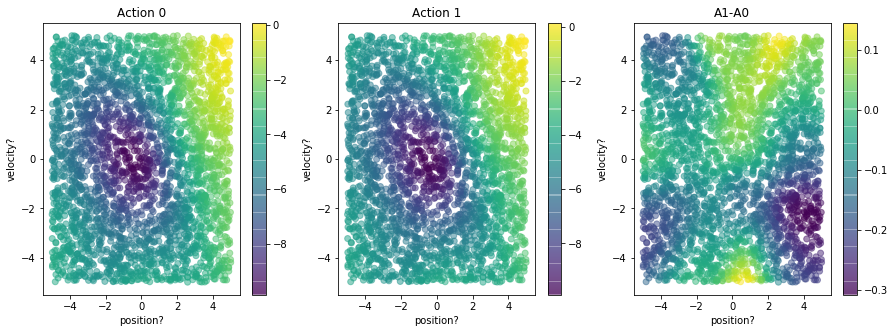

Loss = 0.00003
Loss = 0.00004
Loss = 0.00011
Loss = 0.26275
Loss = 0.00003
Loss = 0.26233
100000


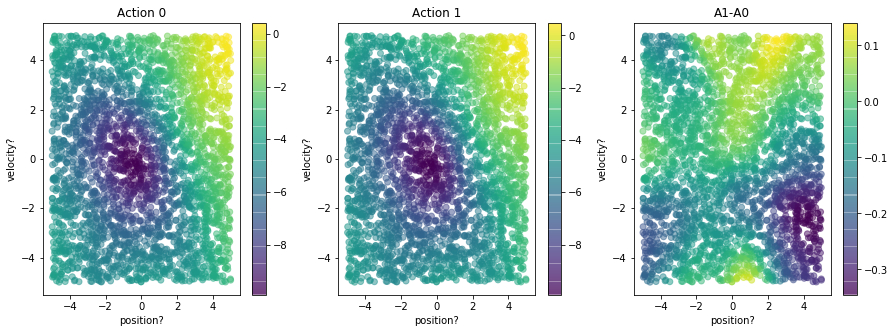

Loss = 0.00009
Loss = 0.00002
Loss = 0.00004
Loss = 0.00004
Loss = 0.00003
Loss = 0.00003
100000


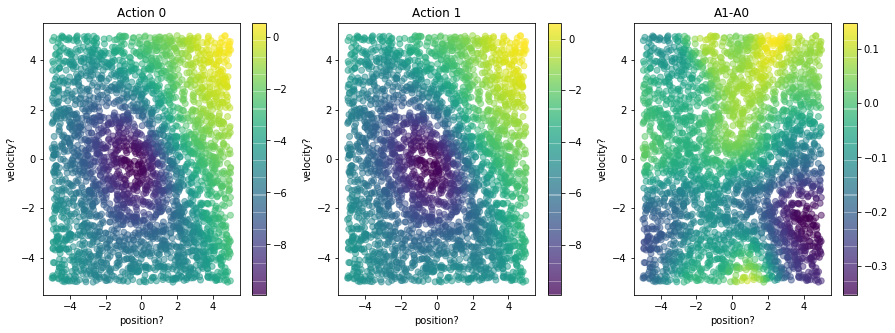

Loss = 0.00003
Loss = 0.00003
Loss = 0.00005
Loss = 0.52338
Loss = 0.00005
Loss = 0.00005
100000


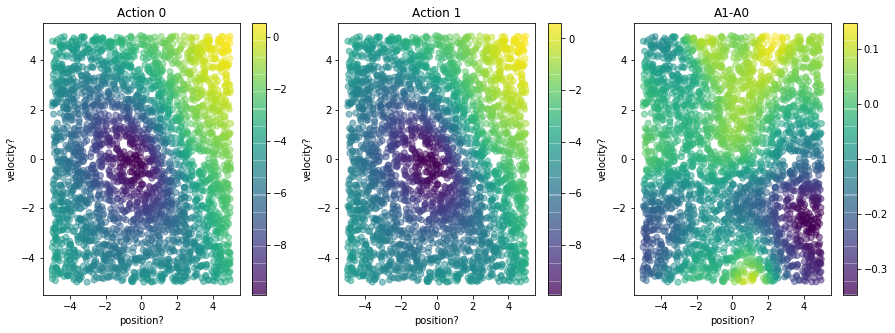

Loss = 0.00005
Loss = 0.25908
Loss = 0.00005
Loss = 0.00004
Loss = 0.00008
Loss = 0.00004
100000


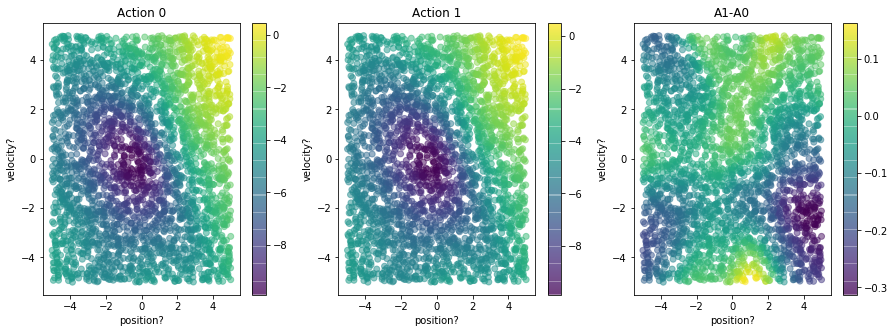

Loss = 0.00019
Loss = 0.00012
Loss = 0.00003
Loss = 0.26174
Loss = 0.25854
Loss = 0.00009
100000


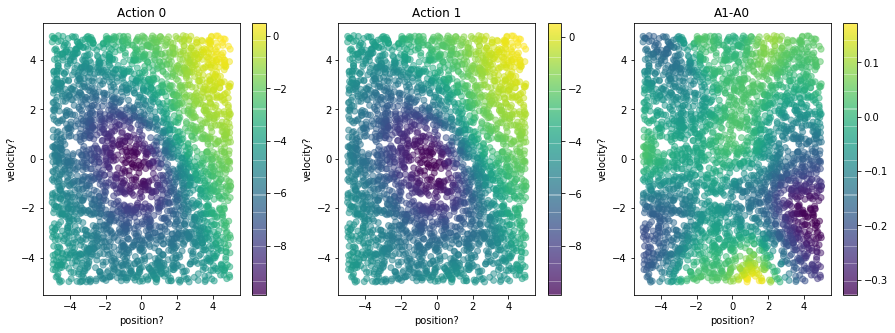

Loss = 0.00015
Loss = 0.00006
Loss = 0.00010
Loss = 0.00009
Loss = 0.00007
Loss = 0.00012
100000


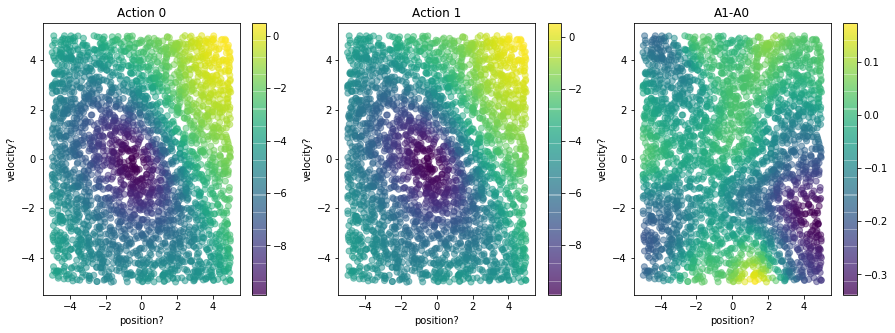

Loss = 0.00013
Loss = 0.00007
Loss = 0.26197
Loss = 0.00003
Loss = 0.00017
Loss = 0.00005
100000


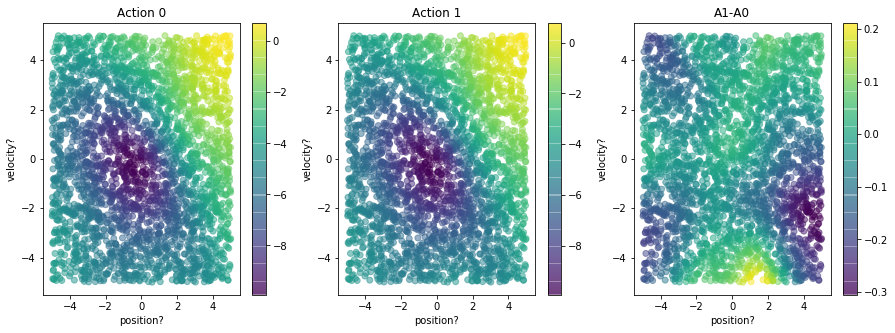

Loss = 0.00004
Loss = 0.00005
Loss = 0.26258
Loss = 0.00005
Loss = 0.00006
Loss = 0.00006
100000


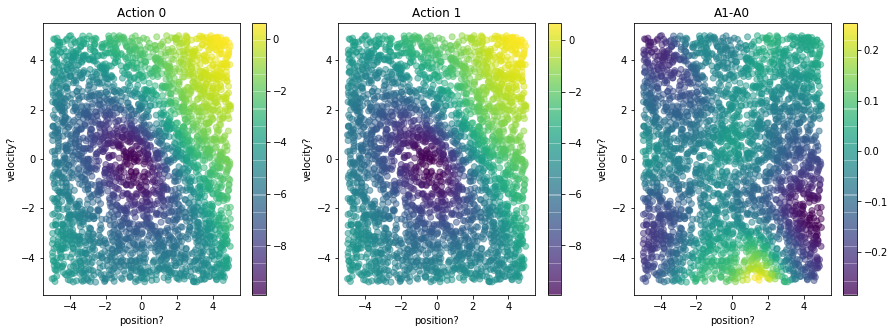

Loss = 0.26152


KeyboardInterrupt: 

In [10]:
learner.eps = 1
for i in tqdm(range(500), "random warmup"):
    learner.rollout()
    if i % 30 == 9:
        print(len(learner._replay))
        viz.plot_q()



Eps = 0.40 on 1 of 5


Loss = 0.00010
Loss = 0.25801
Loss = 0.00008
Loss = 0.00007
Loss = 0.00006
Loss = 0.00011
Loss = 0.00003
Loss = 0.00007
Loss = 0.00004
Loss = 0.00004
Loss = 0.00003
Loss = 0.00006
Loss = 0.00003
Loss = 0.00012
Loss = 0.00011
Loss = 0.00005
Loss = 0.25428
Loss = 0.26292
Loss = 0.00004
Loss = 0.00005



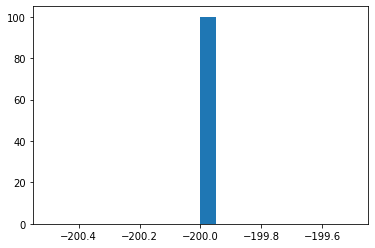

Reward mean,std = -200.000 +/- 0.000


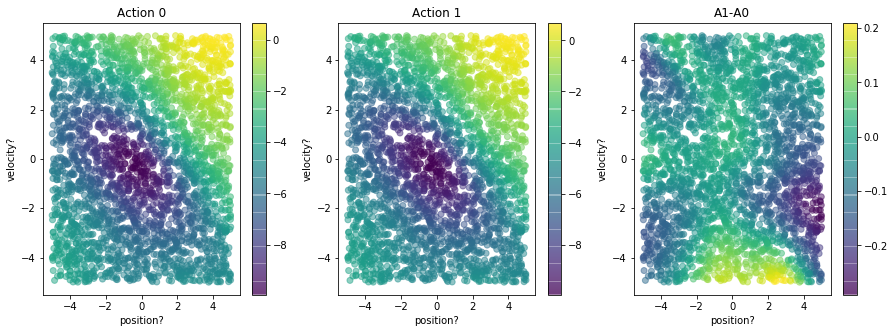



Eps = 0.22 on 2 of 5


Loss = 0.00008
Loss = 0.00006
Loss = 0.00003
Loss = 0.00004
Loss = 0.00005
Loss = 0.00006
Loss = 0.00003
Loss = 0.00006
Loss = 0.00009
Loss = 0.00010
Loss = 0.00004
Loss = 0.26277
Loss = 0.00006
Loss = 0.00016
Loss = 0.00007
Loss = 0.00011
Loss = 0.26127
Loss = 0.00008
Loss = 0.00004
Loss = 0.00008



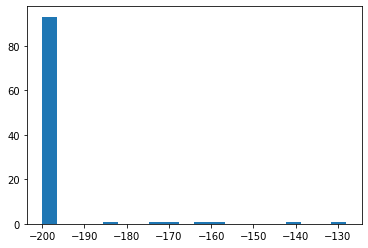

Reward mean,std = -197.150 +/- 11.366


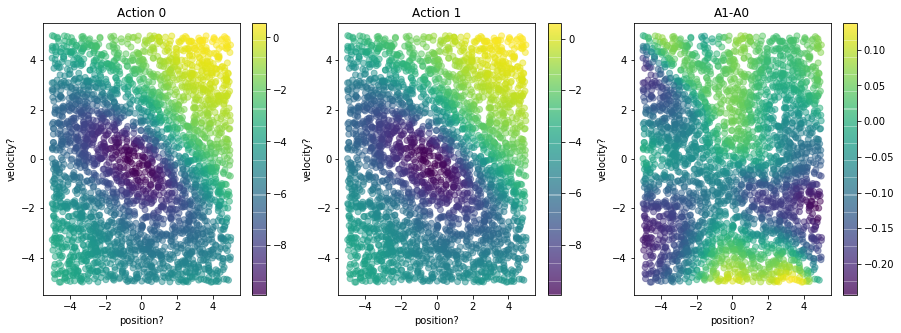



Eps = 0.04 on 3 of 5


Loss = 0.00006
Loss = 0.00004
Loss = 0.00005
Loss = 0.00002
Loss = 0.00004
Loss = 0.00005
Loss = 0.00009
Loss = 0.00010
Loss = 0.00003
Loss = 0.00005
Loss = 0.26221
Loss = 0.00008
Loss = 0.00005
Loss = 0.00002
Loss = 0.00007
Loss = 0.26372
Loss = 0.00009
Loss = 0.00012



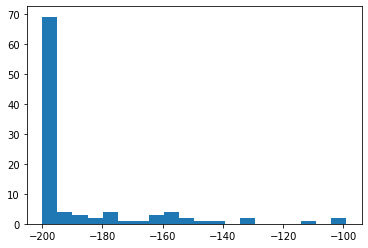

Reward mean,std = -188.230 +/- 22.500


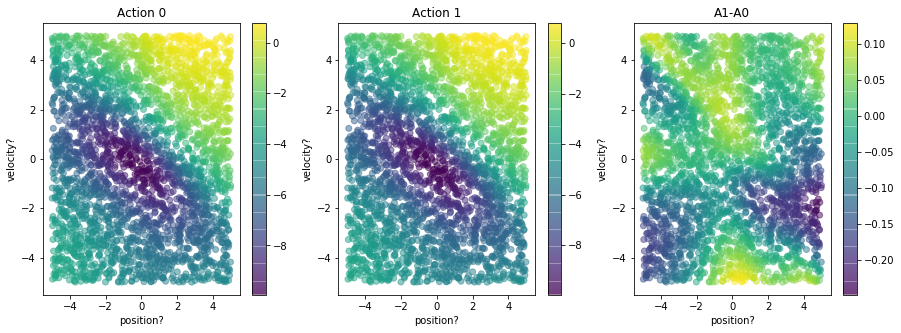



Eps = -0.15 on 4 of 5


Loss = 0.00004
Loss = 0.00005
Loss = 0.00005
Loss = 0.00006
Loss = 0.00008
Loss = 0.26268
Loss = 0.26010
Loss = 0.25829
Loss = 0.00004
Loss = 0.26292
Loss = 0.00014
Loss = 0.00004
Loss = 0.00012
Loss = 0.00005
Loss = 0.00006
Loss = 0.00004
Loss = 0.00004
Loss = 0.00004
Loss = 0.00008



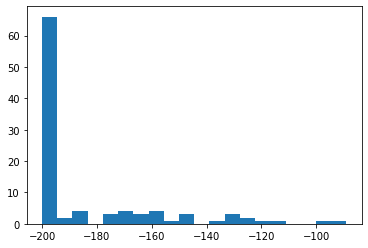

Reward mean,std = -184.300 +/- 26.602


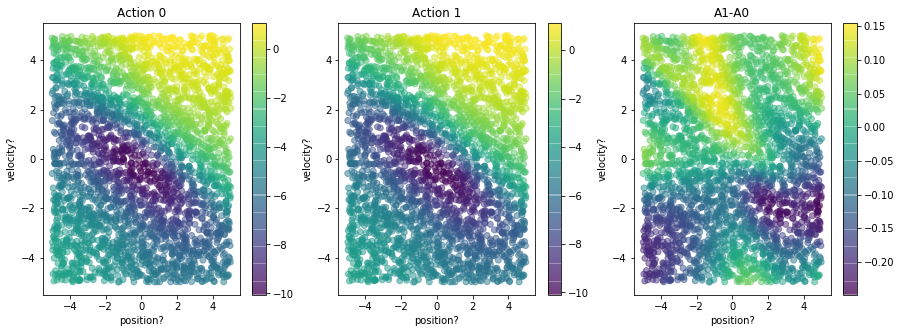



Eps = -0.33 on 5 of 5


Loss = 0.00010
Loss = 0.00009
Loss = 0.00012
Loss = 0.00005
Loss = 0.00020
Loss = 0.00015


In [ ]:
N = 5
for d in range(N):
    eps = 0.4 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    viz.plot_q()

Loss = 0.00014
Loss = 0.00012



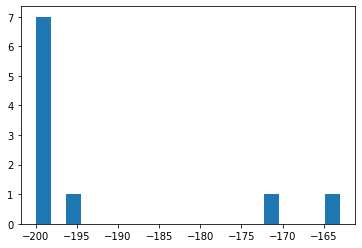

Reward mean,std = -193.000 +/- 12.992


In [6]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=10)

Loss = 0.00006
Loss = 0.00006



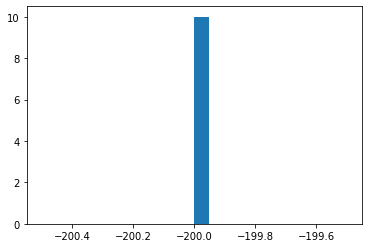

Reward mean,std = -200.000 +/- 0.000


In [7]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=10)

In [8]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%   219.11ms/cyc @     1.0 calls/cyc
              do_learning:  89.6%   196.25ms/cyc @   198.8 calls/cyc
                optimizer:  50.1%   109.80ms/cyc @   182.7 calls/cyc
                   sample:  14.5%    31.86ms/cyc @   182.7 calls/cyc
                 q_target:  10.9%    23.92ms/cyc @   182.7 calls/cyc


In [9]:
learner.eps=0
learner.rollout(render=True)

(199, -200.0)